# Stimulous Check Profit Analyzer

In [1]:
# Import the required libraries and dependencies.
import sys 
import fire
import csv
import numpy as np
import questionary
import pandas as pd 
from pathlib import Path
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

In [2]:
# Read in the CSV file called "Resources.csv" using the Path module.
# The CSV file is located int the Stimulous_Check_Profit_Analyzer folder.
# Set the index to the column "Date".
# Set the parse_date and infer_datetime_format parameters.
gold_df = pd.read_csv(
    Path('../csv_data/csv_files_resources/gold.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True)

# Verify 'Gold' data-type as "float."
gold_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [3]:
# Filter out 'Gold Close' price into a sliced dataframe. 
gold_sliced = gold_df.iloc[:,[0]]

#Rename 'close' price to 'Gold' in a new dataframe.
gold_new = gold_sliced.rename(columns={"Price":'Gold'})

# View the first 5 rows of the DataFrame.
gold_new.head()

,Gold
Date,
2021-12-31,1828.6
2021-12-30,1814.1
2021-12-29,1805.8
2021-12-28,1810.9
2021-12-27,1808.8


In [4]:
silver_df = pd.read_csv(
    Path('../csv_data/csv_files_resources/silver.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True)

# Verify 'Silver' data-type as "float."
silver_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [5]:
# Filter out 'Silver Close' price into a sliced dataframe. 
silver_sliced = silver_df.iloc[:,[0]]

#Rename 'close' price to 'Silver' in a new dataframe.
silver_new = silver_sliced.rename(columns={"Price":'Silver'})

# View the first 5 rows of the DataFrame.
silver_new.head()

,Silver
Date,
2021-12-31,23.381
2021-12-30,23.091
2021-12-29,22.848
2021-12-28,23.111
2021-12-27,22.979


In [6]:
crude_oil_df = pd.read_csv(
    Path('../csv_data/csv_files_resources/crude_oil.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True)

# Verify 'Crude Oil' data-type as "float."
crude_oil_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [7]:
# Filter out 'Crude Oil Close' price into a sliced dataframe. 
crude_oil_sliced = crude_oil_df.iloc[:,[0]]

#Rename 'close' price to 'Crude Oil' in a new dataframe.
crude_oil_new = crude_oil_sliced.rename(columns={"Price":'Crude Oil'})

# View the first 5 rows of the DataFrame.
crude_oil_new.head()

,Crude Oil
Date,
2021-12-31,75.21
2021-12-30,76.99
2021-12-29,76.56
2021-12-28,75.98
2021-12-27,75.57


In [8]:
lumber_df = pd.read_csv(
    Path('../csv_data/csv_files_resources/lumber.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True)

# Verify 'Lumber' data-type as "float."
lumber_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [9]:
# Filter out 'Lumber Close' price into a sliced dataframe. 
lumber_sliced = lumber_df.iloc[:,[0]]

#Rename 'close' price to 'Lumber' in a new dataframe.
lumber_new = lumber_sliced.rename(columns={"Price":'Lumber'})

# View the first 5 rows of the DataFrame.
lumber_new.head()

,Lumber
Date,
2021-12-31,1147.9
2021-12-30,1157.7
2021-12-29,1169.4
2021-12-28,1142.4
2021-12-27,1097.4


In [10]:
gasoline_df = pd.read_csv(
    Path('../csv_data/csv_files_resources/gasoline.csv'),
    index_col = 'Date',
    parse_dates = True,
    infer_datetime_format = True)

# Verify 'Gasoline' data-type as "float."
gasoline_df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %    float64
dtype: object

In [11]:
# Filter out 'Gasoline Close' price into a sliced dataframe. 
gasoline_sliced = gasoline_df.iloc[:,[0]]

#Rename 'close' price to 'Lumber' in a new dataframe.
gasoline_new = gasoline_sliced.rename(columns={"Price":'Gasoline'})

# View the first 5 rows of the DataFrame.
gasoline_new.head()

,Gasoline
Date,
2021-12-31,40.96
2021-12-30,41.97
2021-12-29,41.80
2021-12-28,41.39
2021-12-27,41.14


In [12]:
# Use concatenate function to group btc_new, eth_new, trx_new, xlm_new, xmr_new dataframes into a single dataframe called 'resources'.
resources = pd.concat([gold_new, silver_new, crude_oil_new, lumber_new, gasoline_new], axis=1)
# Display results. 
resources

,Gold,Silver,Crude Oil,Lumber,Gasoline
Date,,,,,
2020-04-15,1751.5,15.869,19.87,324.0,12.52
2020-04-16,1742.7,15.979,19.87,332.6,12.19
2020-04-17,1708.9,15.628,18.27,341.7,12.45
2020-04-19,NaN,15.245,NaN,NaN,NaN
2020-04-20,1721.3,15.913,-37.63,328.5,11.76
...,...,...,...,...,...
2021-12-27,1808.8,22.979,75.57,1097.4,41.14
2021-12-28,1810.9,23.111,75.98,1142.4,41.39
2021-12-29,1805.8,22.848,76.56,1169.4,41.80


In [13]:
resources_daily_returns = resources.pct_change()
resources_daily_returns.head()

,Gold,Silver,Crude Oil,Lumber,Gasoline
Date,,,,,
2020-04-15,NaN,NaN,NaN,NaN,NaN
2020-04-16,-0.005024,0.006932,0.000000,0.026543,-0.026358
2020-04-17,-0.019395,-0.021966,-0.080523,0.027360,0.021329
2020-04-19,0.000000,-0.024507,0.000000,0.000000,0.000000
2020-04-20,0.007256,0.043818,-3.059661,-0.038630,-0.055422


In [14]:
#Define the stimulus amount in a new variable.
starting_value = float(input("Starting amount"))

Starting amount 1200


In [37]:
starting_value

1200.0

In [38]:
#Calculate daily returns for Gold in a new dataframe. 
gold_daily_returns = gold_new.pct_change()

gold_daily_returns.head()

,Gold
Date,
2021-12-31,NaN
2021-12-30,-0.007930
2021-12-29,-0.004575
2021-12-28,0.002824
2021-12-27,-0.001160


In [39]:
#Add an empty portfolio column to Gold Daily Returns. 
gold_daily_returns['Portfolio'] = pd.NaT

gold_daily_returns

,Gold,Portfolio
Date,,
2021-12-31,NaN,NaT
2021-12-30,-0.007930,NaT
2021-12-29,-0.004575,NaT
2021-12-28,0.002824,NaT
2021-12-27,-0.001160,NaT
...,...,...
2020-04-21,-0.029489,NaT
2020-04-20,0.013603,NaT
2020-04-17,-0.007204,NaT


In [40]:
#Calculate the portfolio value over time. 
gold_daily_returns = gold_daily_returns.assign(Portfolio=(1+gold_daily_returns['Gold'].fillna(0)).cumprod().mul(starting_value))

#Rename columns. 
gold = gold_daily_returns.rename(columns={'Gold':'Gold Daily Returns', "Portfolio":" Gold Port"})

#Display results. 
gold.head()

,Gold Daily Returns,Gold Port
Date,,
2021-12-31,NaN,1200.000000
2021-12-30,-0.007930,1190.484524
2021-12-29,-0.004575,1185.037734
2021-12-28,0.002824,1188.384556
2021-12-27,-0.001160,1187.006453


In [41]:
#Calculate daily returns for Silver in a new dataframe. 
silver_daily_returns = silver_new.pct_change()

silver_daily_returns.head()

,Silver
Date,
2021-12-31,NaN
2021-12-30,-0.012403
2021-12-29,-0.010524
2021-12-28,0.011511
2021-12-27,-0.005712


In [42]:
#Add an empty portfolio column to Silver Daily Returns. 
silver_daily_returns['Portfolio'] = pd.NaT

silver_daily_returns

,Silver,Portfolio
Date,,
2021-12-31,NaN,NaT
2021-12-30,-0.012403,NaT
2021-12-29,-0.010524,NaT
2021-12-28,0.011511,NaT
2021-12-27,-0.005712,NaT
...,...,...
2020-04-20,0.050016,NaT
2020-04-19,-0.041978,NaT
2020-04-17,0.025123,NaT


In [43]:
#Calculate the portfolio value over time. 
silver_daily_returns = silver_daily_returns.assign(Portfolio=(1+silver_daily_returns['Silver'].fillna(0)).cumprod().mul(starting_value))

#Rename columns. 
silver = silver_daily_returns.rename(columns={'Silver':'Silver Daily Returns', "Portfolio":" Silver Port"})

#Display results. 
silver.head()

,Silver Daily Returns,Silver Port
Date,,
2021-12-31,NaN,1200.000000
2021-12-30,-0.012403,1185.116120
2021-12-29,-0.010524,1172.644455
2021-12-28,0.011511,1186.142594
2021-12-27,-0.005712,1179.367863


In [44]:
#Calculate daily returns for Crude Oil in a new dataframe. 
crude_oil_daily_returns = crude_oil_new.pct_change()

crude_oil_daily_returns.head()

,Crude Oil
Date,
2021-12-31,NaN
2021-12-30,0.023667
2021-12-29,-0.005585
2021-12-28,-0.007576
2021-12-27,-0.005396


In [45]:
#Add an empty portfolio column to Crude Oil Daily Returns. 
crude_oil_daily_returns['Portfolio'] = pd.NaT

crude_oil_daily_returns

,Crude Oil,Portfolio
Date,,
2021-12-31,NaN,NaT
2021-12-30,0.023667,NaT
2021-12-29,-0.005585,NaT
2021-12-28,-0.007576,NaT
2021-12-27,-0.005396,NaT
...,...,...
2020-04-21,-0.273585,NaT
2020-04-20,-4.759241,NaT
2020-04-17,-1.485517,NaT


In [46]:
#Calculate the portfolio value over time. 
crude_oil_daily_returns = crude_oil_daily_returns.assign(Portfolio=(1+crude_oil_daily_returns['Crude Oil'].fillna(0)).cumprod().mul(starting_value))

#Rename columns. 
crude_oil = crude_oil_daily_returns.rename(columns={'Crude Oil':'Crude Oil Daily Returns', "Portfolio": "Crude Oil Port"})

#Display results. 
crude_oil.head()

,Crude Oil Daily Returns,Crude Oil Port
Date,,
2021-12-31,NaN,1200.000000
2021-12-30,0.023667,1228.400479
2021-12-29,-0.005585,1221.539689
2021-12-28,-0.007576,1212.285600
2021-12-27,-0.005396,1205.743917


In [47]:
#Calculate daily returns for Lumber in a new dataframe. 
lumber_daily_returns = lumber_new.pct_change()

lumber_daily_returns.head()

,Lumber
Date,
2021-12-31,NaN
2021-12-30,0.008537
2021-12-29,0.010106
2021-12-28,-0.023089
2021-12-27,-0.039391


In [48]:
#Add an empty portfolio column to Lumber Daily Returns. 
lumber_daily_returns['Portfolio'] = pd.NaT

lumber_daily_returns

,Lumber,Portfolio
Date,,
2021-12-31,NaN,NaT
2021-12-30,0.008537,NaT
2021-12-29,0.010106,NaT
2021-12-28,-0.023089,NaT
2021-12-27,-0.039391,NaT
...,...,...
2020-04-21,-0.036126,NaT
2020-04-20,0.034646,NaT
2020-04-17,0.040183,NaT


In [49]:
#Calculate the portfolio value over time. 
lumber_daily_returns = lumber_daily_returns.assign(Portfolio=(1+lumber_daily_returns['Lumber'].fillna(0)).cumprod().mul(starting_value))

#Rename columns. 
lumber = lumber_daily_returns.rename(columns={'Lumber':'Lumber Daily Returns', "Portfolio": "Lumber Port"})

#Display results. 
lumber.head()

,Lumber Daily Returns,Lumber Port
Date,,
2021-12-31,NaN,1200.000000
2021-12-30,0.008537,1210.244795
2021-12-29,0.010106,1222.475825
2021-12-28,-0.023089,1194.250370
2021-12-27,-0.039391,1147.207945


In [50]:
#Calculate daily returns for Gasoline in a new dataframe. 
gasoline_daily_returns = gasoline_new.pct_change()

gasoline_daily_returns.head()

,Gasoline
Date,
2021-12-31,NaN
2021-12-30,0.024658
2021-12-29,-0.004051
2021-12-28,-0.009809
2021-12-27,-0.006040


In [51]:
#Add an empty portfolio column to Gasoline Daily Returns. 
gasoline_daily_returns['Portfolio'] = pd.NaT

gasoline_daily_returns

,Gasoline,Portfolio
Date,,
2021-12-31,NaN,NaT
2021-12-30,0.024658,NaT
2021-12-29,-0.004051,NaT
2021-12-28,-0.009809,NaT
2021-12-27,-0.006040,NaT
...,...,...
2020-04-21,-0.114058,NaT
2020-04-20,0.173653,NaT
2020-04-17,0.058673,NaT


In [52]:
#Calculate the portfolio value over time. 
gasoline_daily_returns = gasoline_daily_returns.assign(Portfolio=(1+gasoline_daily_returns['Gasoline'].fillna(0)).cumprod().mul(starting_value))

#Rename columns. 
gasoline = gasoline_daily_returns.rename(columns={'Gasoline':'Gasoline Daily Returns', "Portfolio":" Gasoline Port"})

#Display results. 
gasoline.head()

,Gasoline Daily Returns,Gasoline Port
Date,,
2021-12-31,NaN,1200.000000
2021-12-30,0.024658,1229.589844
2021-12-29,-0.004051,1224.609375
2021-12-28,-0.009809,1212.597656
2021-12-27,-0.006040,1205.273438


In [53]:
#Use concatenate function to group the daily_returns and port values into one dataframe. 
resources_new = pd.concat([gold, silver, crude_oil, lumber, gasoline],axis=1)

#Display results.
resources_new

,Gold Daily Returns,Gold Port,Silver Daily Returns,Silver Port,Crude Oil Daily Returns,Crude Oil Port,Lumber Daily Returns,Lumber Port,Gasoline Daily Returns,Gasoline Port
Date,,,,,,,,,,
2020-04-15,0.005050,1149.403916,-0.006884,814.456182,0.000000,317.032310,-0.025857,338.705462,0.027071,366.796875
2020-04-16,0.019779,1143.629006,0.022460,820.101792,0.087575,317.032310,-0.026632,347.695792,-0.020884,357.128906
2020-04-17,-0.007204,1121.448102,0.025123,802.087165,-1.485517,291.503789,0.040183,357.208816,0.058673,364.746094
2020-04-19,NaN,NaN,-0.041978,782.430178,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-20,0.013603,1129.585475,0.050016,816.714426,-4.759241,-600.398883,0.034646,343.409705,0.173653,344.531250
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.001160,1187.006453,-0.005712,1179.367863,-0.005396,1205.743917,-0.039391,1147.207945,-0.006040,1205.273438
2021-12-28,0.002824,1188.384556,0.011511,1186.142594,-0.007576,1212.285600,-0.023089,1194.250370,-0.009809,1212.597656
2021-12-29,-0.004575,1185.037734,-0.010524,1172.644455,-0.005585,1221.539689,0.010106,1222.475825,-0.004051,1224.609375


<AxesSubplot:xlabel='Date'>

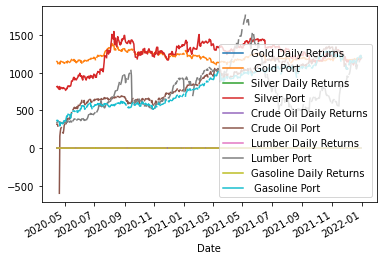

In [54]:
resources_new.plot()

In [55]:
#Drop 'Daily Returns' column. 
resources_sliced = resources_new.iloc[:,[1,3,5,7,9]]
resources_sliced

,Gold Port,Silver Port,Crude Oil Port,Lumber Port,Gasoline Port
Date,,,,,
2020-04-15,1149.403916,814.456182,317.032310,338.705462,366.796875
2020-04-16,1143.629006,820.101792,317.032310,347.695792,357.128906
2020-04-17,1121.448102,802.087165,291.503789,357.208816,364.746094
2020-04-19,NaN,782.430178,NaN,NaN,NaN
2020-04-20,1129.585475,816.714426,-600.398883,343.409705,344.531250
...,...,...,...,...,...
2021-12-27,1187.006453,1179.367863,1205.743917,1147.207945,1205.273438
2021-12-28,1188.384556,1186.142594,1212.285600,1194.250370,1212.597656
2021-12-29,1185.037734,1172.644455,1221.539689,1222.475825,1224.609375


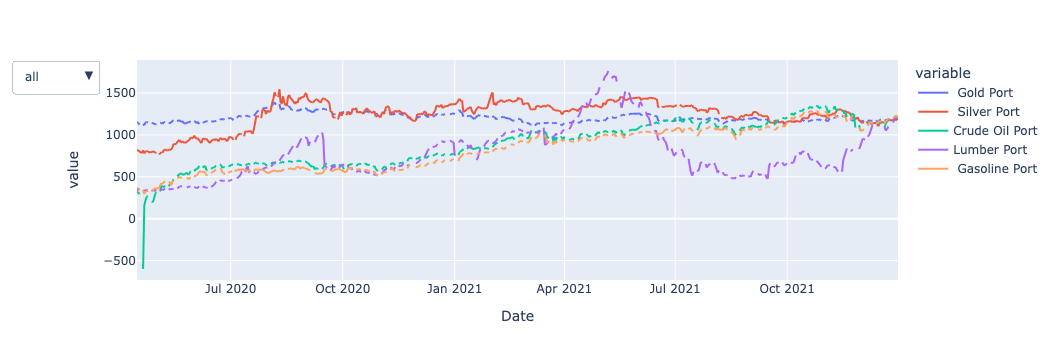

In [56]:
#Build a figure for all series
fig = px.line(resources_sliced, x=resources_sliced.index, y = resources_sliced.columns)
#Map lines/series to groups
maps = {'group 1': ['Gold Port', 'Silver Port'],
           'group 2':['Crude Oil Port', 'Lumber Port', "Gasoline Port"]}

#Create group and trace visibilites
group = []
vis = []
visList = []
for m in maps.keys():
    for col in resources_sliced.columns:
        if col in maps[m]:
            vis.append(True)
        else:
            vis.append(False)
    group.append(m)
    visList.append(vis)
    vis = []
    
#Create buttons for each group
buttons = []
for i, g in enumerate(group):
    button =  dict(label=g,
                   method = 'restyle',
                    args = ['visible',visList[i]])
    buttons.append(button)

buttons = [{'label': 'all',
                 'method': 'restyle',
                 'args': ['visible', [True, True, True, True, True, True]]}] + buttons

                     

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
)
# buttons
fig.show()

In [57]:
#Create a dataframe to filter out daily returns % change.
resources_sliced_vol = resources_new.iloc[:,[0,2,4,6,8]]
resources_sliced_vol

,Gold Daily Returns,Silver Daily Returns,Crude Oil Daily Returns,Lumber Daily Returns,Gasoline Daily Returns
Date,,,,,
2020-04-15,0.005050,-0.006884,0.000000,-0.025857,0.027071
2020-04-16,0.019779,0.022460,0.087575,-0.026632,-0.020884
2020-04-17,-0.007204,0.025123,-1.485517,0.040183,0.058673
2020-04-19,NaN,-0.041978,NaN,NaN,NaN
2020-04-20,0.013603,0.050016,-4.759241,0.034646,0.173653
...,...,...,...,...,...
2021-12-27,-0.001160,-0.005712,-0.005396,-0.039391,-0.006040
2021-12-28,0.002824,0.011511,-0.007576,-0.023089,-0.009809
2021-12-29,-0.004575,-0.010524,-0.005585,0.010106,-0.004051


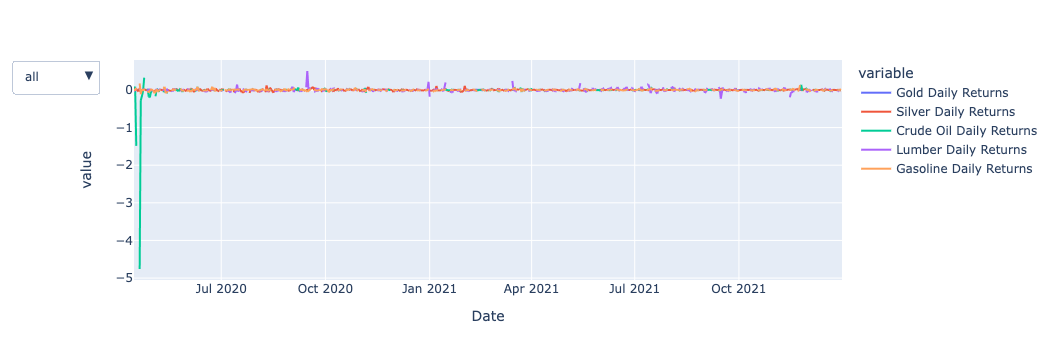

In [58]:
#Create a plot for daily returns to demonstrate volatility. 
#Build a figure for all series
fig = px.line(resources_sliced_vol, x=resources_sliced_vol.index, y = resources_sliced_vol.columns,)
#Map lines/series to groups
maps = {'group 1': ['Gold Daily Returns', 'Silver Daily Returns'],
           'group 2':['Crude Oil Daily Returns', 'Lumber Daily Returns', "Gasoline Daily Returns"]}

#Create group and trace visibilites
group = []
vis = []
visList = []
for m in maps.keys():
    for col in resources_sliced_vol.columns:
        if col in maps[m]:
            vis.append(True)
        else:
            vis.append(False)
    group.append(m)
    visList.append(vis)
    vis = []
    
#Create buttons for each group
buttons = []
for i, g in enumerate(group):
    button =  dict(label=g,
                   method = 'restyle',
                    args = ['visible',visList[i]])
    buttons.append(button)

buttons = [{'label': 'all',
                 'method': 'restyle',
                 'args': ['visible', [True, True, True, True, True, True]]}] + buttons

                     

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
)
# buttons
fig.show()